Our problematic is that density is really respected in our network as long as it evolves.  
We must, therefore, find rules such that it can work properly, having nice and realistic 2D representation.

In [1]:
from gpn4 import GrowingPlanarNetwork
import networkx as nx
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import kurtosis, skew

In [3]:
root = "output/evonet/"

In [4]:
seed = 1
random.seed(seed)
np.random.seed(seed)
gpn = GrowingPlanarNetwork()
gpn.init_square(8)

In [5]:
Gstart = gpn.G.copy()

In [6]:
Gstart.size(), len(Gstart.nodes), len(Gstart.edges), Gstart.number_of_nodes()

(112, 64, 112, 64)

In [7]:
def p_dupl():
    return np.random.random() > 0.48

In [8]:
pos = nx.spring_layout(gpn.G, k=0.1, iterations=50)
# plt.figure(figsize=(8, 8))
# nx.draw_networkx(gpn.G, pos=pos)
ratio = 0
for i in range(1000):
    # print(gpn.G.number_of_nodes(), ratio)
    # gpn.check_all()
    if p_dupl():
        ratio += 1
        gpn.duplicate_random_node()
    else:
        ratio -= 1
        gpn.remove_random_node()
        
    pos = nx.spring_layout(gpn.G, pos=pos, k=0.1, iterations=10)
    if True:
        plt.figure(figsize=(8, 8))
        nx.draw_networkx(gpn.G, pos)
        plt.savefig(root + str(i).zfill(4) + ".png")
        plt.close()
    if i % 100 == 0:
        print()
        print("Iteration", i, "ratio", ratio, "density", gpn.density())
        print(gpn.G.number_of_nodes(), gpn.G.number_of_edges())
        dist = np.array(list(nx.betweenness_centrality(gpn.G).values()))
        print(skew(dist), kurtosis(dist))
        print(gpn.G.number_of_nodes(), gpn.D.degree(-1))


Iteration 0 ratio -1 density 0.08035714285714286
63 112
0.3633125824848966 -1.0069799333356633
63 28
Removing crossing border edge
Removing crossing border edge

Iteration 100 ratio -3 density 0.16897506925207756
61 126
1.9561592012954623 4.231508853847512
61 19


KeyboardInterrupt: 

In [9]:
list_inner = [gpn.G.degree(n) for n in gpn.G.nodes if not gpn.is_border_node(n)]
list_outer = [gpn.G.degree(n) for n in gpn.G.nodes if gpn.is_border_node(n)]

(array([12.,  0.,  0., 31.,  0.,  0., 37.,  0.,  0., 11.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 10 artists>)

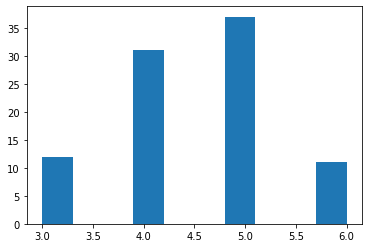

In [10]:
plt.hist(list_inner)

(array([3., 0., 7., 0., 0., 8., 0., 8., 0., 1.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

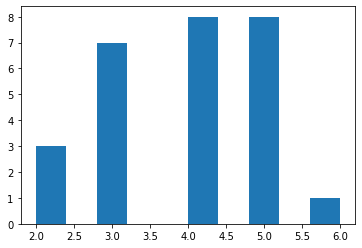

In [11]:
plt.hist(list_outer)

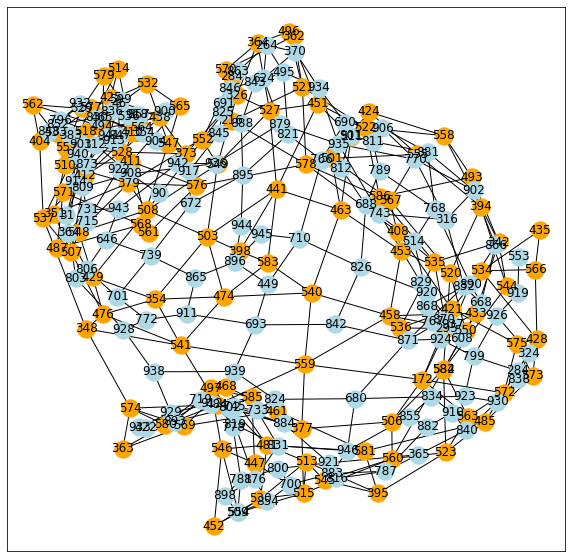

In [12]:
gpn.show_all()

In [13]:
raise

RuntimeError: No active exception to reraise

In [ ]:
# test 1
def test_func():
    gpn = GrowingPlanarNetwork()
    gpn.init_square(8)
    for i in range(500):
        if p_dupl():
            gpn.duplicate_random_node()
        else:
            gpn.remove_random_node()
    dist = np.array(list(nx.betweenness_centrality(gpn.G).values()))
    return (skew(dist), kurtosis(dist), gpn.G, gpn.D)

for i in range(10):
    S, K, G, D = test_func()
    print(G.size(), D.degree(-1))

In [ ]:
G = gpn.G

In [ ]:
pos = nx.spring_layout(G, k=0.1, iterations=50)
pos = nx.planar_layout(gpn.G)
plt.figure(figsize=(12, 12))
nx.draw_networkx(gpn.G, pos=pos)

In [ ]:
pos = nx.planar_layout(Gstart)
plt.figure(figsize=(12, 12))
nx.draw_networkx(Gstart, pos=pos)

In [ ]:
raise

In [ ]:
gpn.show_all()

In [ ]:
ls_ngb = [len(gpn.ngb(x)) for x in gpn.G.nodes]

In [ ]:
plt.hist(ls_ngb)

In [ ]:
raise

In [ ]:
couple_ngb = [(len(gpn.ngb(x)), x) for x in gpn.G.nodes if len(gpn.ngb(x)) > 4]
couple_ngb

In [ ]:
gpn.stabilize_ngb(10)

In [ ]:
couple_ngb = [(len(gpn.ngb(x)), x) for x in gpn.G.nodes if len(gpn.ngb(x)) > 4]
couple_ngb